In [10]:
import numpy as np
import pandas as pd
import scipy as sci
from scipy import linalg as la
import matplotlib.pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


EIG
25.19 [-0.1095 -0.5848 -0.8038]
-0.0 [-0.8165 -0.4082  0.4082]
1.98 [ 0.5669 -0.701   0.4328]

SVD
25.19 [-0.1095 -0.5848 -0.8037]
1.99 [ 0.5669 -0.7009  0.4328]
0.0 [-0.8165 -0.4082  0.4082]


The eigenvalue 25.188076 describes the 92.69742141087265 % of the data set.
The eigenvalue -0.0 describes the 0.0 % of the data set.
The eigenvalue 1.984283 describes the 7.3025791032800855 % of the data set.

Thus we can remove the third row from the dataset to decrease the dimension of this system.


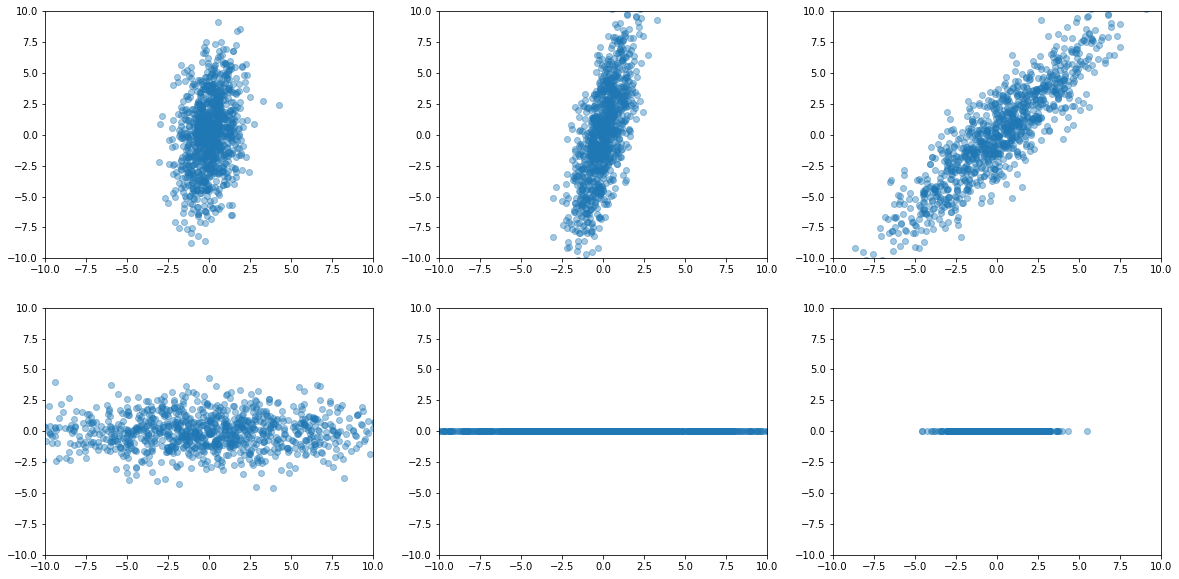

In [11]:
#Exercise 1

np.set_printoptions(precision=4, suppress=True)

N = 1000
x1 = np.array([np.random.randn() for i in range(N)])
x2 = x1 + np.array([3*np.random.randn() for i in range(N)])
x3 = 2*x1 + x2
data = np.array([x1,x2,x3])

print('EIG')
A = np.cov(data)
l, V = la.eig(A)
l = np.real_if_close(l)
for li, vi in zip(l, V.T):
    print(round(li,2), vi)

print('\nSVD')
U, S, Vt = la.svd(data)
for si, ui in zip(S, U.T):
    print(round((si**2)/(N-1),2), ui)

print('\n')
for li in l:
    print('The eigenvalue', round(li,6), 'describes the', abs(round(li,6)/A.trace()*100), '%', 'of the data set.')

print('\nThus we can remove the third row from the dataset to decrease the dimension of this system.')

new_data = np.delete(data, 2, axis=0)

data_p = U.T.dot(data)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

ax[0,0].scatter(data[0],data[1],alpha=0.4)
ax[0,1].scatter(data[0],data[2],alpha=0.4)
ax[0,2].scatter(data[1],data[2],alpha=0.4)
ax[1,0].scatter(data_p[0],data_p[1],alpha=0.4)
ax[1,1].scatter(data_p[0],data_p[2],alpha=0.4)
ax[1,2].scatter(data_p[1],data_p[2],alpha=0.4)

for i in range(2):
    for j in range(3):
        ax[i,j].set_xlim([-10,10])
        ax[i,j].set_ylim([-10,10])

plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [12]:
#Exercise 2

data_2 = data

for i in range(10):
    row = np.array([1/50*np.random.randn() for i in range(N)])
    data_2 = np.vstack((data_2,row))

U_2, S_2, Vt_2 = la.svd(data_2)
S_2 =( S_2**2)/(N-1)
for li in S_2:
    print('The eigenvalue', round(li,6), 'describes the', abs(round(li,6)/A.trace()*100), '%', 'of the data set.')

data_p_2 = U_2.T.dot(data_2)

The eigenvalue 25.191836 describes the 92.71125900229904 % of the data set.
The eigenvalue 1.985172 describes the 7.3058508104019095 % of the data set.
The eigenvalue 0.00045 describes the 0.0016560947185840114 % of the data set.
The eigenvalue 0.000432 describes the 0.001589850929840651 % of the data set.
The eigenvalue 0.000421 describes the 0.001549368614497486 % of the data set.
The eigenvalue 0.000406 describes the 0.0014941654572113525 % of the data set.
The eigenvalue 0.000402 describes the 0.0014794446152683837 % of the data set.
The eigenvalue 0.000377 describes the 0.0013874393531248274 % of the data set.
The eigenvalue 0.000377 describes the 0.0013874393531248274 % of the data set.
The eigenvalue 0.000364 describes the 0.0013395966168101782 % of the data set.
The eigenvalue 0.000349 describes the 0.0012843934595240447 % of the data set.
The eigenvalue 0.000337 describes the 0.0012402309336951376 % of the data set.
The eigenvalue 0.0 describes the 0.0 % of the data set.


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [13]:
#Exercise 3

m, k, A = 10, 0.5, 5
w = np.sqrt(k/m)

t = np.arange(0,100,0.1)
x = np.array([A*np.sin(w*ti) for ti in t])
y = np.array([np.random.rand() for i in range(len(t))])
z = np.array([0 for i in range(len(t))])
coord = np.array([x,y,z])

alpha, beta, gamma = np.random.randint(6), np.random.randint(6), np.random.randint(6)
Rx = np.array([[1,0,0],[0,np.cos(alpha),np.sin(alpha)],[0,-np.sin(alpha),np.cos(alpha)]])
Ry = np.array([[np.cos(beta),0,-np.sin(beta)],[0,1,0],[np.sin(beta),0,np.cos(beta)]])
Rz = np.array([[np.cos(gamma),np.sin(gamma),0],[-np.sin(gamma),np.cos(gamma),0],[0,0,1]])
R = np.dot(Rx,np.dot(Ry,Rz))

rot_coord = np.dot(R,coord)

A = np.cov(rot_coord)
l, V = la.eig(A)
l = np.real_if_close(l)
for li, vi in zip(l, V.T):
    print(round(li,2), vi)

print('\n')
for li in l:
    print('The eigenvalue', round(li,2), 'describes the', abs(round(li/A.trace()*100,2)), '%', 'of the data set.')

print('\nThe only coordinate that matter is the one along the x axis.')


12.13 [-0.1862 -0.6579 -0.7298]
-0.0 [-0.9589 -0.04    0.2808]
0.08 [ 0.214  -0.7521  0.6234]


The eigenvalue 12.13 describes the 99.32 % of the data set.
The eigenvalue -0.0 describes the 0.0 % of the data set.
The eigenvalue 0.08 describes the 0.68 % of the data set.

The only coordinate that matter is the one along the x axis.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [19]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/

file_name = "magic04.data"
data = pd.read_csv(file_name)
data.columns = ['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

U, S, Vt = la.svd(data.loc[:,['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']])
for si, ui in zip(S, U.T):
    print(round(si,2), ui)

print('\n')
for si in S:
    print('The eigenvalue', round(si,2), 'describes the', abs(round(si/np.sum(S)*100,2)), '%', 'of the data set.')

#N.B: I can't calculate S**2/(N-1) becouse its dimension is too big and my computer won't allow me to do that

30132.65 [-0.0068 -0.01   -0.0039 ... -0.0091 -0.0144 -0.0106]
8935.96 [ 0.0049  0.0038  0.0026 ...  0.0016 -0.0048 -0.0277]
6296.47 [-0.0009 -0.0214 -0.0043 ...  0.0035 -0.0181 -0.0113]
5045.65 [ 0.0036 -0.0281  0.0005 ... -0.0024 -0.0029 -0.0092]
3952.49 [-0.0034  0.0011 -0.0015 ...  0.0006  0.0045 -0.0027]
2871.91 [ 0.0035  0.0163  0.0027 ...  0.0032  0.0227 -0.0099]
1494.02 [ 0.0009 -0.0422  0.0008 ... -0.0113 -0.0149  0.0139]
103.58 [ 0.002  -0.0193  0.0091 ... -0.0034 -0.0209 -0.0044]
25.75 [ 0.0094  0.0064  0.0124 ... -0.0067 -0.0145  0.0021]
2.84 [-0.0218 -0.0005 -0.0112 ...  0.0056 -0.0077  0.0036]


The eigenvalue 30132.65 describes the 51.19 % of the data set.
The eigenvalue 8935.96 describes the 15.18 % of the data set.
The eigenvalue 6296.47 describes the 10.7 % of the data set.
The eigenvalue 5045.65 describes the 8.57 % of the data set.
The eigenvalue 3952.49 describes the 6.71 % of the data set.
The eigenvalue 2871.91 describes the 4.88 % of the data set.
The eigenvalue